<a href="https://colab.research.google.com/github/Mostak-Ahmmed/Data-Mining/blob/main/213902126_B_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:


data_url = "https://raw.githubusercontent.com/Ataullha/Demo-Dataset/refs/heads/main/income.csv"
df = pd.read_csv(data_url)

df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


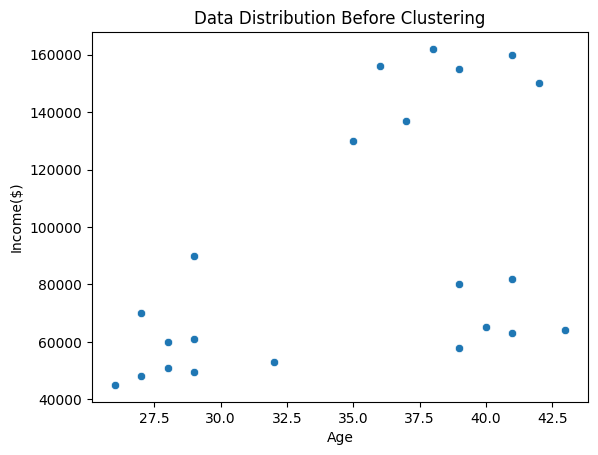

In [ ]:

X = df[["Age", "Income($)"]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


sns.scatterplot(x="Age", y="Income($)", data=df)
plt.title("Data Distribution Before Clustering")
plt.show()

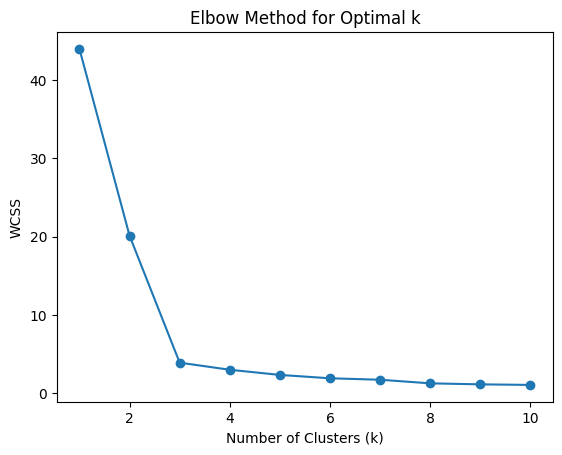

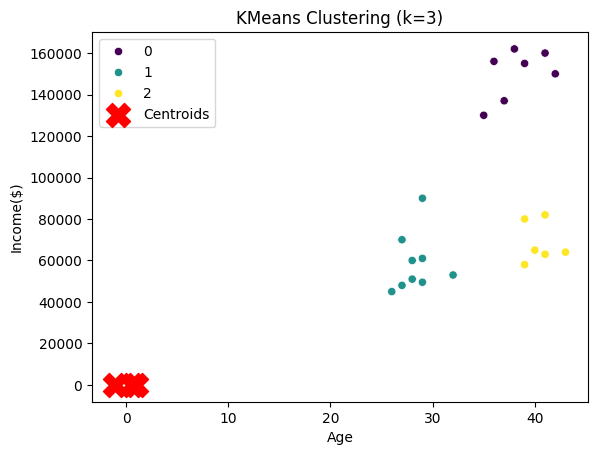

In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


sns.scatterplot(x="Age", y="Income($)", data=df, hue=clusters, palette="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="red",
    label="Centroids",
    marker="X",
)
plt.title("KMeans Clustering (k=3)")
plt.legend()
plt.show()

In [ ]:


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


df["Cluster"] = clusters

In [ ]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1]
df2 = df[df.Cluster==2]

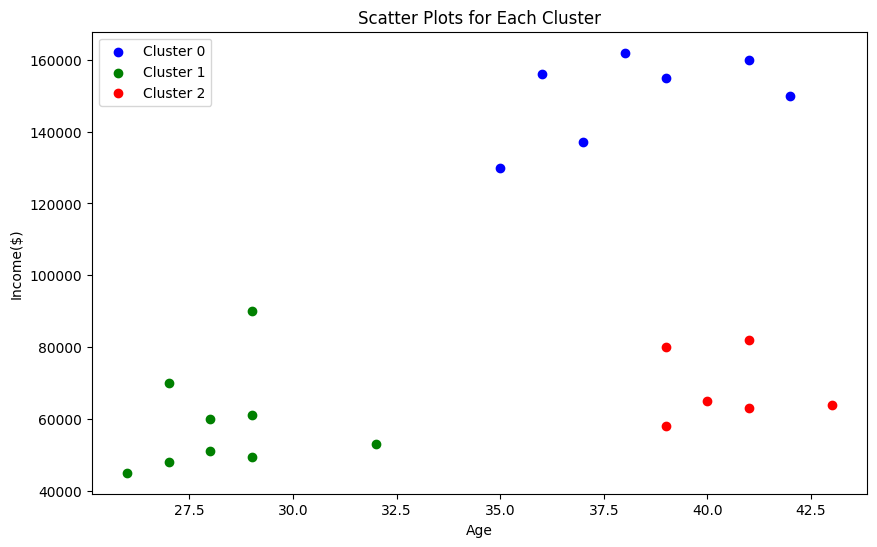

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.scatter(df0['Age'], df0['Income($)'], label='Cluster 0', color='blue')


plt.scatter(df1['Age'], df1['Income($)'], label='Cluster 1', color='green')


plt.scatter(df2['Age'], df2['Income($)'], label='Cluster 2', color='red')

plt.title('Scatter Plots for Each Cluster')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()